# Praktik 1: Membuat dan Mengaplikasikan Filter Moving Average


Tujuan: Memahami cara kerja filter moving average untuk menghasilkan efek smooting pada gambar.

Saving example_image.jpg to example_image.jpg


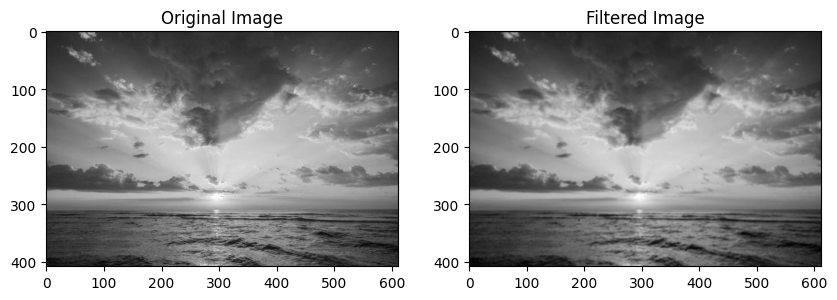

In [1]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, 0)   # Baca gambar dalam grayscale

# Buat kernel moving average 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Terapkan filter
filtered_img = cv2.filter2D(img, -1, kernel)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(filtered_img, cmap='gray'), plt.title('Filtered Image')
plt.show()


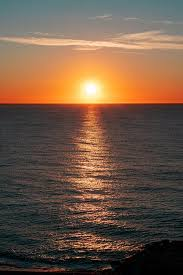





Hasil Analisis Output: menunjukkan bahwa gambar asli (di sebelah kiri) memiliki detail yang lebih tajam, terutama pada area batas antara
langit, matahari, dan pantulan cahaya di permukaan air. Setelah diterapkan filter rata-rata (gambar sebelah kanan), detail gambar menjadi lebih
halus karena filter ini mengurangi variasi intensitas piksel di sekitamya. Efeknya, beberapa tepi atau garis yang tajam menjadi sedikit kabur,
yang menunjukkan bahwa filter ini efektif untuk mengurangi noise atau detail kecil pada gambar.

# Praktik 2: Deteksi Fitur dengan SIFT


Tujuan: Mendeteksi fitur penting menggunakan algoritma SIFT dan menampilkannya pada gambar.

Saving image2.jpg to image2.jpg


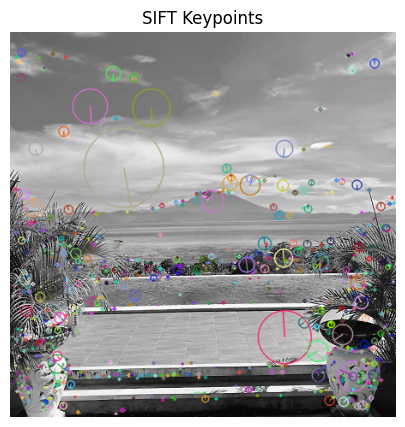

In [2]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, 0)  # Baca gambar dalam grayscale

# Buat SIFT detector
sift = cv2.SIFT_create()

# Deteksi keypoints dan deskriptor
keypoints, descriptors = sift.detectAndCompute(img, None)

# Gambar Keypoints
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.imshow(img_with_keypoints)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

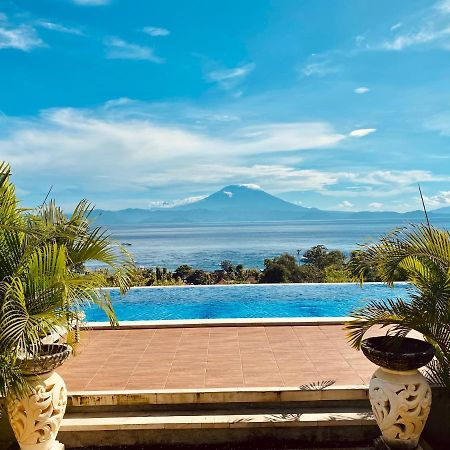






Hasil Analisis Output: menunjukkan bahwa algoritma SIFT berhasil mendeteksi berbagai keypoints (ditampilkan dengan lingkaran berwarna)
pada gambar. Keypoints ini merepresentasikan fitur-fitur unik dalam gambar, seperti sudut, pola tekstur, atau area kontras tinggi, yang stabil
terhadap perubahan Skala atau rotasi. Lingkaran-lingkaran tersebut menunjukkan posisi, Skala, dan orientasi dari tiap keypoint. Pada gambar
ini, keypoints tersebar di area dengan detail tinggi, seperti pohon, tepi kolam, dan bagian gunung, menandakan bahwa algoritma SIFT efektif
dalam menemukan fitur signifikan pada elemen-elemen kompleks.

# Praktik 3: Deteksi Fitur dengan SIFT


Tujuan: Membuat histogram untuk menganalisis distribusi warna dalam gambar.


Saving image3.jpg to image3.jpg


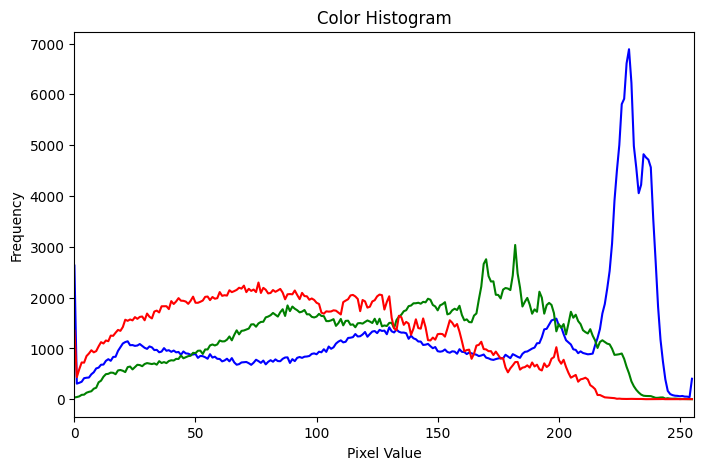

In [3]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img= cv2.imread(img_path) # Baca gambar berwarna

# Pisahkan channel warna dan buat histogram
colors = ('b', 'g', 'r')
plt.figure(figsize=(8, 5))
for i, color in enumerate(colors):
    histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

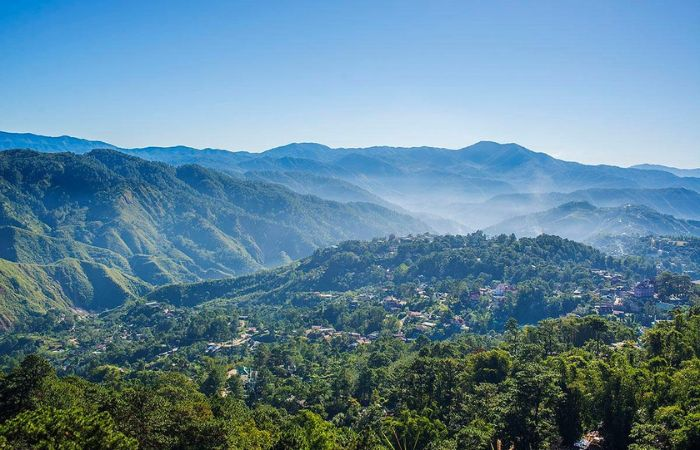

Hasil Output: menunjukkan histogram warna dari gambar pemandangan. Grafik menggambarkan distribusi intensitas piksel untuk masing-masing channel warna (biru, hijau, merah). Channel biru memiliki puncak yang lebih tinggi di sekitar nilai intensitas 250, menunjukkan dominasi warna biru di langit. Channel hijau menunjukkan distribusi yang merata di intensitas menengah, merepresentasikan warna hijau dari pepohonan. Sementara itu, channel merah memiliki intensitas yang lebih rendah dibandingkan biru dan hijau, menunjukkan bahwa warna merah kurang dominan dalam gambar ini. Histogram ini mencerminkan komposisi warna alami pada pemandangan dengan langit biru cerah dan banyak vegetasi

# Praktik 4: Gaussian Smooting


Tujuan: Menggunakan Gaussian filter untuk melakukan smooting pada gmabar.


Saving images4.png to images4.png


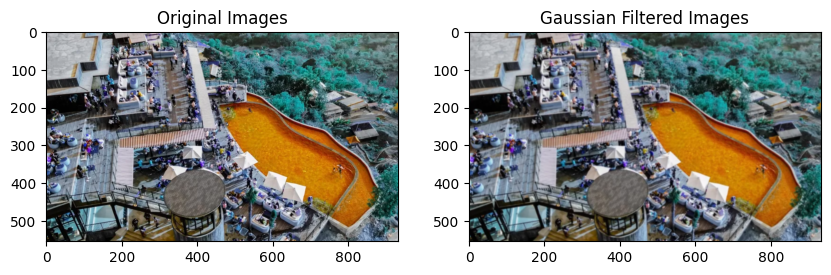

In [4]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path) # Baca gambar dalam grayscale

# Terapkan Gaussian blur
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 1)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Images')
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filtered Images')
plt.show()

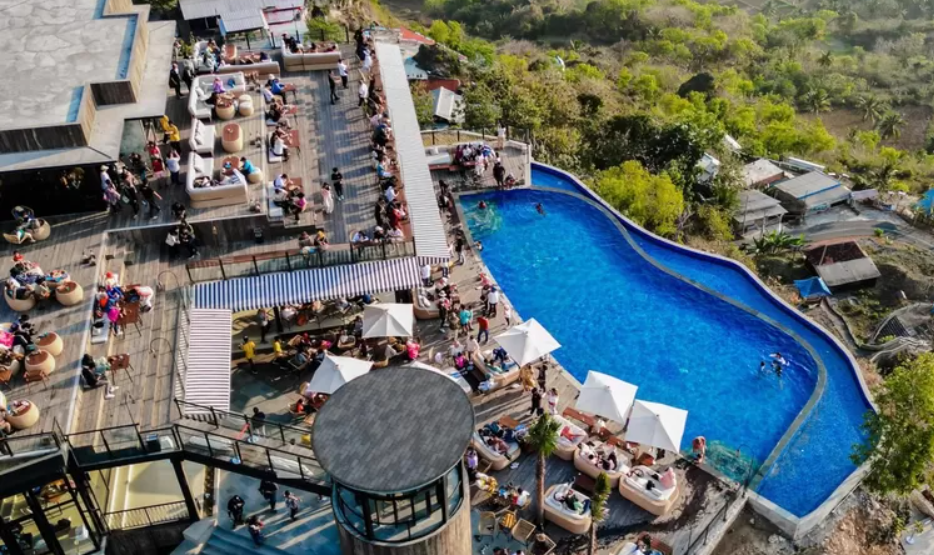

Hasil Output: menunjukkan perbandingan antara gambar asli (kiri) dan gambar yang telah difllter menggunakan Gaussian blur (kanan). Pada
gambar yang difllter, detail tajam pada gambar, seperti tepi bangunan dan tekstur pepohonan, menjadi lebih halus dan kabur, karena filter
Gaussian mengurangi variasi intensitas piksel secara lokal. Hal ini membantu mengurangi noise sekaligus menciptakan efek smoothing, yang
sering digunakan dalam pra-pemrosesan gambar untuk analisis lebih lanjut atau pengurangan noise pada data visual.

# Praktik 5: Deteksi Tepi dengan Sobel Filter


Tujuan: Mendeteksi tepi objek dalam gambar menggunakan Sobel filter


Saving image5jpg.jpg to image5jpg.jpg


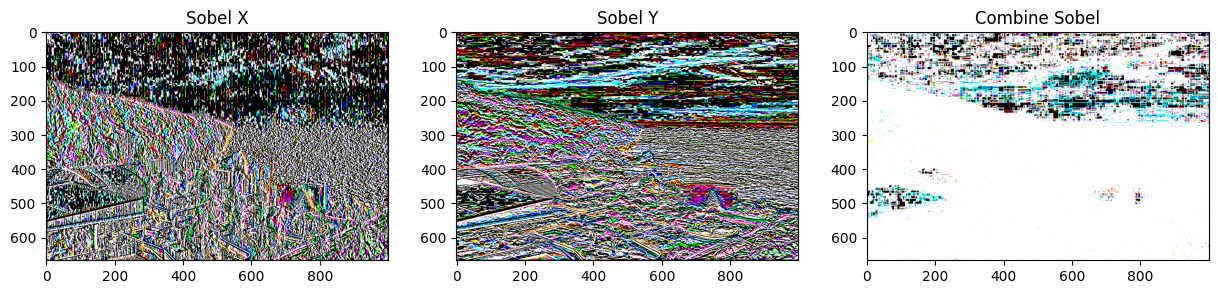

In [5]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path) # Baca gambar dalam grayscale

# Terapkan Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # Tepi horizontal
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # Tepi vertical
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combine Sobel')
plt.show()

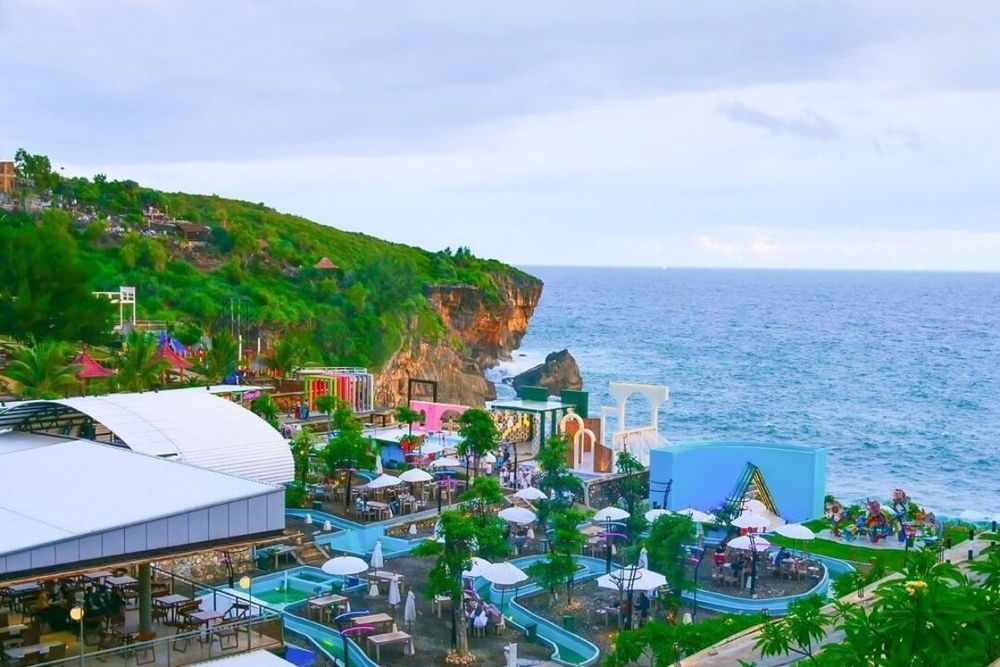

Hasil Output: menunjukkan penerapan Sobel filter pada gambar untuk mendeteksi tepi dalam tiga tampilan: tepi horizontal (Sobel X), tepi
vertikal (Sobel Y), dan kombinasi keduanya (Combined Sobel). Pada Sobel X, detail tepi yang sejajar secara vertikal (seperti dinding dan batas
objek) terlihat lebih menonjol, sedangkan Sobel Y menyoroti tepi horizontal seperti garis cakrawala atau atap bangunan. Gambar kombinasi
(Combined Sobel) menunjukkan tepi keseluruhan yang lebih jelas dan mencakup informasi dari kedua arah, sehingga memberikan representasi
struktur gambar yang lebih menyeluruh. Teknik ini efektif untuk mendeteksi kontur dan fitur geometris pada gambar

# Praktik 6: Representasi Fitur dengan Histogram of Oriented Gradients (HOG)


Tujuan: Menghasilkan representasi fitur menggunakan HOG (Histogram of Oriented Gradients)


Saving images4.png to images4 (1).png


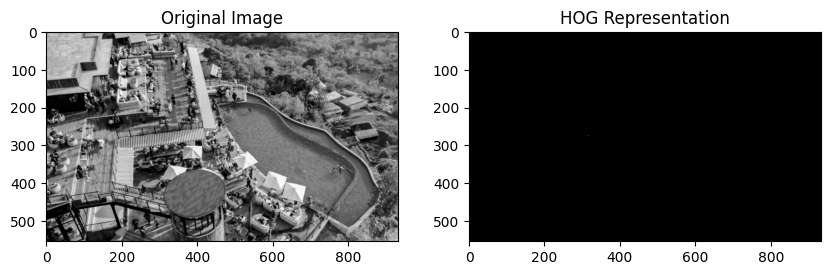

In [8]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import numpy as np

# Unggah gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, 0) # Baca gambar dalam greyscale

# Ekstraksi fitur HOG dengan parameter yang disesuaikan
features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Normalisasi HOG image dengan scaling manual jika normalisasi default gagal
hog_image_normalized = (hog_image - hog_image.min()) / (hog_image.max() - hog_image.min() * 255)
hog_image_normalized = np.uint8(hog_image_normalized) # Konversi ke uints untuk visualisasi

# Tapilkan Hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(hog_image_normalized, cmap='gray'), plt.title('HOG Representation')
plt.show()